In [3]:
# Loading library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [4]:

df = pd.read_csv(r"D:\Kuliah Semester 6\Praktikum Pembelajaran Mesin\UTS\citrus(1).csv")

In [5]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [6]:
## Menentukan X dan Y
X = df.iloc[:,1:5].values
y = df.iloc[:,0].values

In [7]:
print(y)

['orange' 'orange' 'orange' ... 'grapefruit' 'grapefruit' 'grapefruit']


In [8]:
print(X)

[[  2.96  86.76 172.    85.  ]
 [  3.91  88.05 166.    78.  ]
 [  4.42  95.17 156.    81.  ]
 ...
 [ 15.59 256.5  168.    82.  ]
 [ 15.92 260.14 142.    72.  ]
 [ 16.45 261.51 152.    74.  ]]


In [9]:
##CEK DATA DUPLIKAT
df[df.duplicated()].shape

(0, 6)

In [10]:
##Hapus Data Duplikat
dfnew = df.drop_duplicates()

In [11]:
print(dfnew)

            name  diameter  weight  red  green  blue
0         orange      2.96   86.76  172     85     2
1         orange      3.91   88.05  166     78     3
2         orange      4.42   95.17  156     81     2
3         orange      4.47   95.60  163     81     4
4         orange      4.48   95.76  161     72     9
...          ...       ...     ...  ...    ...   ...
9995  grapefruit     15.35  253.89  149     77    20
9996  grapefruit     15.41  254.67  148     68     7
9997  grapefruit     15.59  256.50  168     82    20
9998  grapefruit     15.92  260.14  142     72    11
9999  grapefruit     16.45  261.51  152     74     2

[10000 rows x 6 columns]


In [12]:
##CEK KEMBALI DATA DUPLIKAT
print(dfnew.duplicated().sum())

0


In [14]:
##Cek Missing Value
dfnew.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

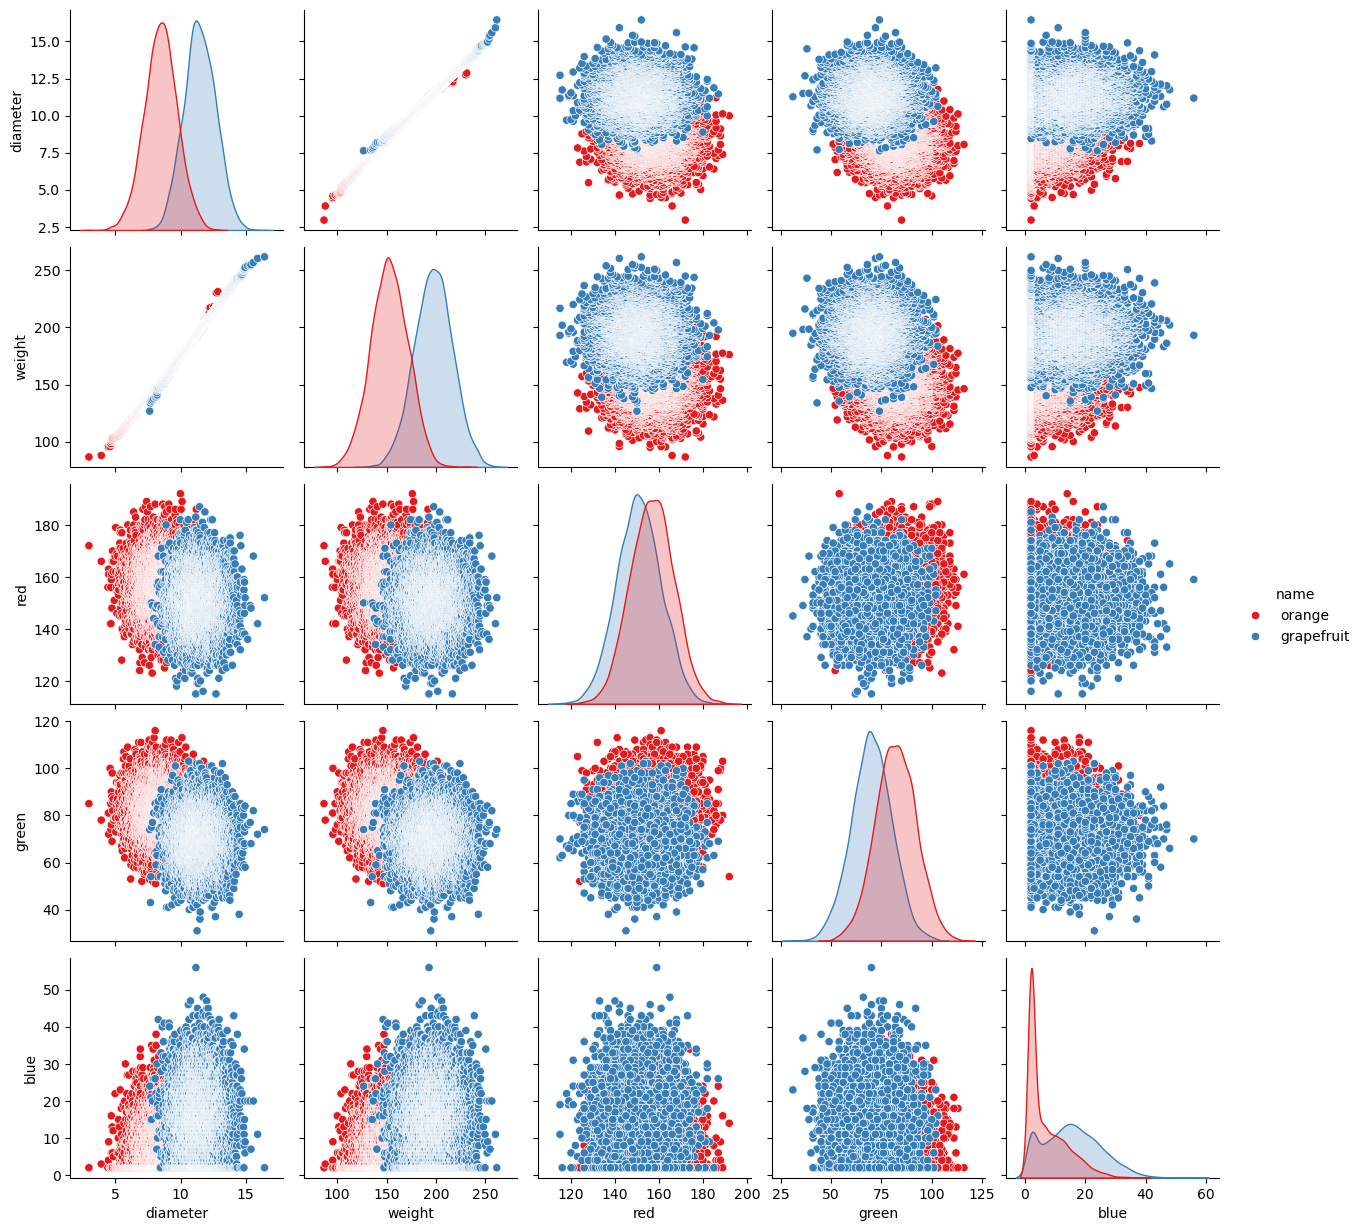

In [15]:
# Visualisasi pairplot
sns.pairplot(dfnew, hue='name', palette='Set1')
plt.show()

In [26]:
## Menentukan X dan Y baru
X = dfnew.iloc[:,1:5].values
y = dfnew.iloc[:,0].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [29]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['grapefruit' 'grapefruit']
 ['orange' 'orange']
 ['orange' 'orange']
 ...
 ['orange' 'orange']
 ['orange' 'orange']
 ['orange' 'orange']]


In [30]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  grapefruit       0.95      0.97      0.96      1237
      orange       0.97      0.95      0.96      1263

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500



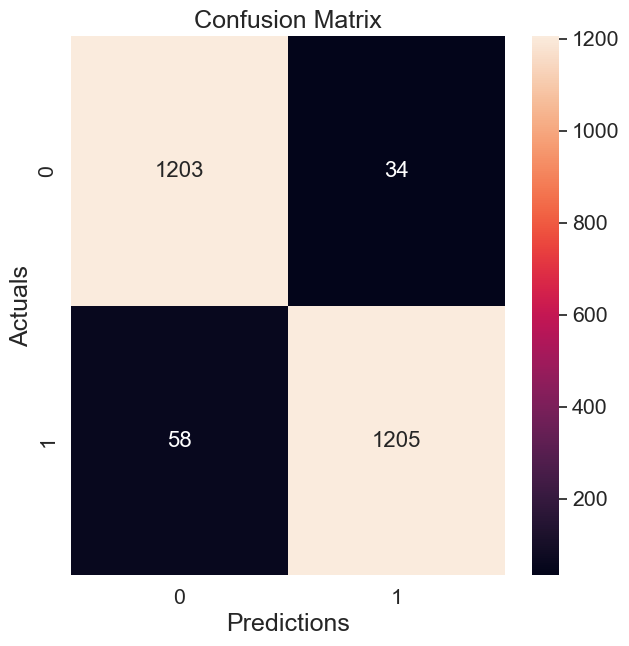

In [31]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, ax=ax, annot=True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

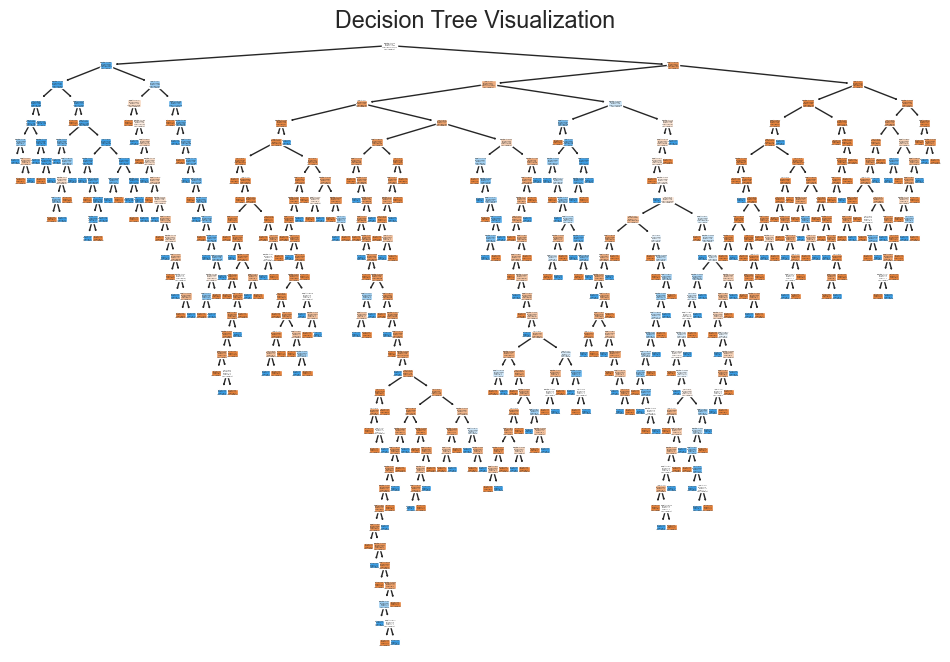

In [37]:
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=dfnew.columns[1:5], class_names=np.unique(y).astype(str))
plt.title("Decision Tree Visualization")
plt.show()


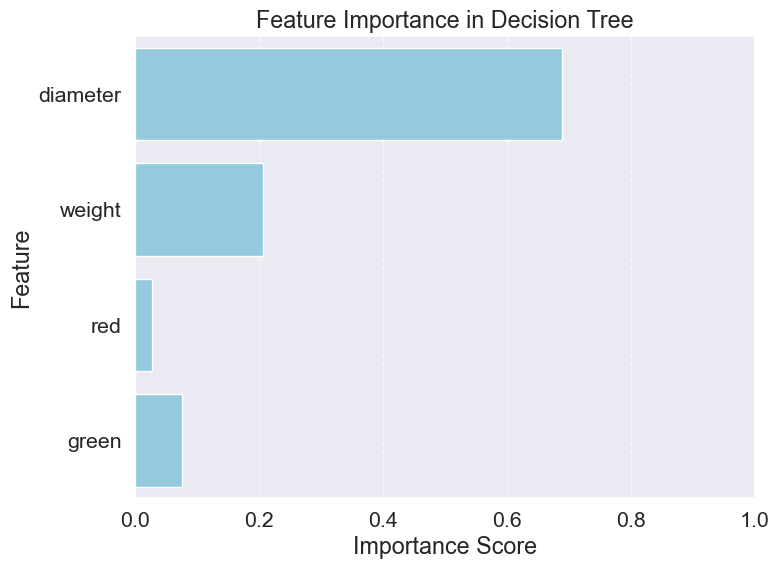

In [40]:
# --- Visualisasi Feature Importance ---
importances = classifier.feature_importances_
feature_names = dfnew.columns[1:5]

plt.figure(figsize=(8, 6))
bars = sns.barplot(x=importances, y=feature_names, color="skyblue")
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

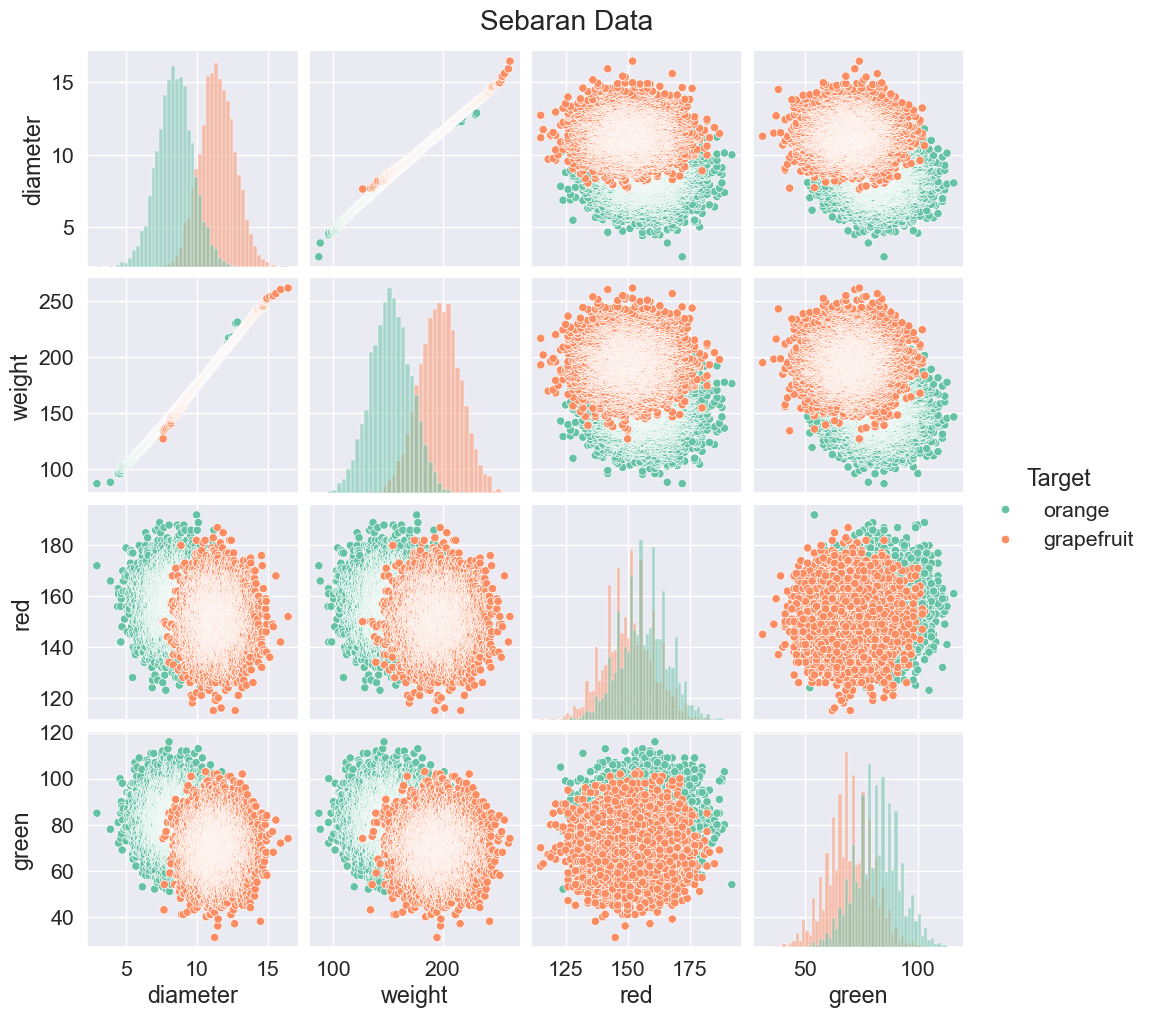

In [41]:
# Gabungkan fitur dan label menjadi satu DataFrame
df_plot = dfnew.iloc[:, 1:5].copy() 
df_plot['Target'] = y

# Pairplot untuk visualisasi sebaran data
sns.pairplot(df_plot, hue='Target', diag_kind='hist', palette='Set2')
plt.suptitle("Sebaran Data ", y=1.02)
plt.show()